<h3>Import Libraries</h3>

In [81]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV,cross_val_score 
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn import tree

In [82]:
dataset = pd.read_csv("../dataset_v0.csv")

<h3>Pre-processing</h3>

In [83]:
# drop unnecessary features
#drops = ['Number', 'title', 'artist', 'top genre', 'bpm', 'nrgy', 'dB', 'dnce', 'live', 'val','spch']

drops = ['Number', 'title', 'artist']


for drop in drops:
    dataset = dataset.drop(drop, axis=1)

<h5>Data Transformation</h5>

In [84]:
# list of categorical columns
categorical_cols = ['top genre']

# initialize the OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

# fit and transform the selected categorical columns
encoded_features = encoder.fit_transform(dataset[categorical_cols])


In [85]:
# create a new DataFrame with the encoded features
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_cols))

In [86]:
# remove the original categorical columns from the original DataFrame
dataset.drop(columns=categorical_cols, inplace=True)

# Concatenate the encoded DataFrame with the original DataFrame
dataset = pd.concat([dataset, encoded_df], axis=1)

In [87]:
dataset.describe()

,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,...,top genre_native american,top genre_neo mellow,top genre_new wave pop,top genre_permanent wave,top genre_pop,top genre_r&b,top genre_rock-and-roll,top genre_soft rock,top genre_uk garage,top genre_yodeling
count,651.000000,651.000000,651.000000,651.000000,651.000000,651.000000,651.000000,651.000000,651.000000,651.000000,...,651.000000,651.000000,651.000000,651.000000,651.000000,651.000000,651.000000,651.000000,651.000000,651.000000
mean,1994.685100,119.159754,61.741935,60.499232,-8.302611,18.113671,57.413210,224.976959,29.331797,6.202765,...,0.001536,0.006144,0.004608,0.003072,0.016897,0.001536,0.001536,0.007680,0.001536,0.001536
std,17.823772,24.938305,21.601234,14.987418,3.658790,14.386296,24.357777,58.975466,28.637424,6.220714,...,0.039193,0.078205,0.067780,0.055385,0.128985,0.039193,0.039193,0.087368,0.039193,0.039193
min,1945.000000,62.000000,6.000000,18.000000,-24.000000,2.000000,6.000000,98.000000,0.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1979.000000,102.000000,45.000000,51.000000,-10.500000,9.000000,39.000000,187.500000,5.500000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1998.000000,120.000000,65.000000,62.000000,-8.000000,13.000000,58.000000,219.000000,19.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2010.000000,134.000000,79.000000,71.000000,-6.000000,23.500000,78.000000,255.000000,51.000000,6.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2019.000000,199.000000,100.000000,96.000000,-1.000000,93.000000,99.000000,511.000000,99.000000,47.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<h5>Data Selection</h5>

In [88]:
# X for features and y for target
X = dataset.drop('pop', axis=1)
y = dataset['pop']


<h5>Feature Normalization</h5>

In [89]:
# perform feature normalization using standardization (Z-score normalization)
#scaler = StandardScaler()
#scaler.fit(X)
#X_scaled = scaler.fit_transform(X)  #didnt work

# perform feature normalization using min-max scaling method
# Create an instance of MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler to the data and transform the features
X_scaled = scaler.fit_transform(X)

<h5>Data Splitting</h5>

In [90]:
# split into testing and training datasets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

<h3>Model Creation</h3>

<h5>Model Training</h5>

In [91]:
# initialize the Decision Tree Regressor
regressor = DecisionTreeRegressor(criterion="squared_error", max_depth=5, min_samples_split=2, min_samples_leaf=7, random_state=5)

# fit the trainig datasets
regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, min_samples_leaf=7, random_state=5)

<h5>Model Graph</h5>

In [92]:
# Visualize the decision tree
#plt.figure(figsize=(12, 8))
#tree.plot_tree(regressor, feature_names=X_train.columns, filled=True)
#plt.show()

<h3>Model Evaluation</h3>

In [93]:
regressor.score(X_train, y_train)


0.49289803070461136

In [94]:
regressor.score(X_test, y_test)

0.2516036370484106

In [95]:
# the the model for prediciton using the test data
y_predict = regressor.predict(X_test)

In [96]:
# compute for the Mean Square Error
mse = mean_squared_error(y_test, y_predict)

# compute for the Root Mean Square Error
rmse = np.sqrt(mse)

# display results
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")

MSE: 145.77815678987082
RMSE: 12.073862546421125


<h5>Cross Validation</h5>

In [97]:
# perform 10-fold cross-validation
scores = cross_val_score(regressor, X_train, y_train, scoring="neg_mean_squared_error", cv=10)

print(f"Cros-Validation Scores: {abs(scores)}")
print(f"Mean Cross-Validation Score {abs(scores.mean())}")

Cros-Validation Scores: [101.29492666 106.23355598 177.94007157 118.21489207 198.52637207
 113.17311473  99.69449193 135.60537231 200.42106973  87.69711082]
Mean Cross-Validation Score 133.880097785966


<h3>Data Visualization</h3>

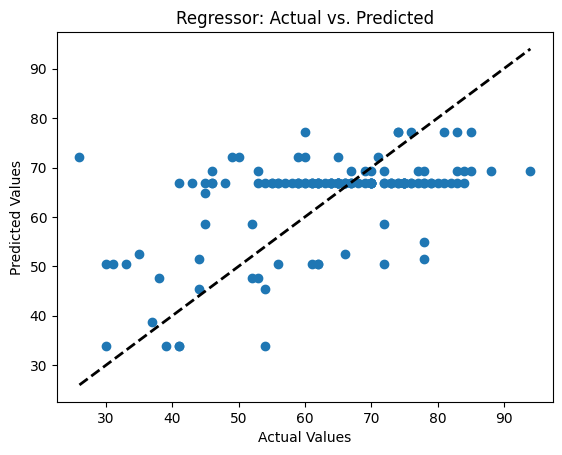

In [98]:
# plt the predicted values against the actual values
plt.scatter(y_test, y_predict)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # diagonal line for reference
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Regressor: Actual vs. Predicted')
plt.show()
